The goal of this problem is to visualize inequality constraints. We want to minimize the objective function below,



In [6]:
def objective(X):
    x1, x2 = X
    return np.exp(x1) * (4 * x1**2 + 2 * x2**2 + 4 * x1 * x2 + 2 * x2 + 1)

subject to the inequality constraints:

$x_1 x_2 - x_1 - x_2 \le -1.5$

and

$x_1 x_2 \ge -10$.

Recall that we have to code these inequality constraints as functions that are greater than or equal to zero. Write a function for each inequality constraint. They should be named `ineq1` and `ineq2`, and each one should take a single argument `X` that unpacks to `x1, x2`.



In [7]:
import numpy as np
def ineq1(X):
    x1, x2 = X
    return -1 * (x1 * x2 - x1 - x2 + 1.5)

def ineq2(X):
    x1, x2 = X
    return x1 * x2 + 10

When you are done, you should be able to run this code block to see the inequalities. Here we use a contourf plot with just two levels to show the space where the inequality functions are greater than zero. We use an `alpha` argument which makes each plot transparent. Where the regions overlap they will appear darker, and these are regions where both inequalities are satisfied.



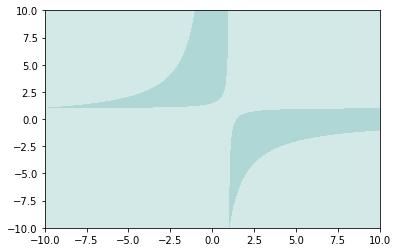

In [68]:
X1, X2 = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))

IE1 = ineq1([X1, X2])
IE2 = ineq2([X1, X2])

%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(X1, X2, IE1, levels=np.linspace(0, IE1.max(), 2), alpha=0.2)
plt.contourf(X1, X2, IE2, levels=np.linspace(0, IE2.max(), 2), alpha=0.2)

Next, run this block to overlay the objective function with the inequality constraint regions. This will show you regions you can make initial guesses from.



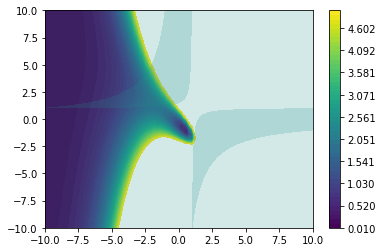

In [11]:
Z = objective([X1, X2])
plt.contourf(X1, X2, Z, levels=np.linspace(Z.min(), Z.min() + 5))
plt.colorbar()
IE1 = ineq1([X1, X2])
IE2 = ineq2([X1, X2])

plt.contourf(X1, X2, IE1, levels=np.linspace(0, IE1.max(), 2), alpha=0.2)
plt.contourf(X1, X2, IE2, levels=np.linspace(0, IE2.max(), 2), alpha=0.2)

There are at least 3 solutions that are possible in the x1, x2 space used above. Use minimize to find them, and plot them on a new figure to see where they are.



### solution



The key here is choosing the initial guesses. Two should be straightforward: there is one at the far left of the upper region, and one in the lower region. The third is trickier, and is near the elbow in the upper region.

sol1:       fun: 0.023550379624169462
     jac: array([ 0.01839701, -0.00228436])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([-9.54740503,  1.04740503]) 

sol2:       fun: 0.9464987259154565
     jac: array([ 0.45395592, -0.02633973])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-3.54753684,  2.81885742]) 

sol3:       fun: 3.060773016634769
     jac: array([11.2200219 , -0.74737173])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 1.18249727, -1.73976695]) 



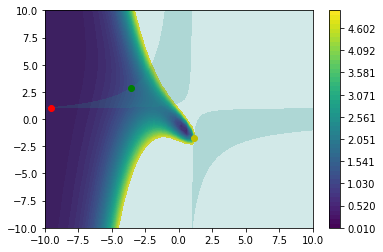

In [70]:
from scipy.optimize import minimize
sol1 = minimize(objective, (-2.5, 1), constraints=[{'type': 'ineq', 'fun': ineq1},
                                                {'type': 'ineq', 'fun': ineq2}])
print('sol1: ', sol1, '\n')

sol2 = minimize(objective, (1, 1), constraints=[{'type': 'ineq', 'fun': ineq1},
                                                  {'type': 'ineq', 'fun': ineq2}])
print('sol2: ', sol2, '\n')

sol3 = minimize(objective, (1, -1), constraints=[{'type': 'ineq', 'fun': ineq1},
                                                  {'type': 'ineq', 'fun': ineq2}])

print('sol3: ', sol3, '\n')

%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(X1, X2, Z, levels=np.linspace(Z.min(), Z.min() + 5))
plt.colorbar()
IE1 = ineq1([X1, X2])
IE2 = ineq2([X1, X2])

plt.contourf(X1, X2, IE1, levels=np.linspace(0, IE1.max(), 2), alpha=0.2)
plt.contourf(X1, X2, IE2, levels=np.linspace(0, IE2.max(), 2), alpha=0.2)

plt.plot(sol1.x[0], sol1.x[1], 'ro')
plt.plot(sol2.x[0], sol2.x[1], 'go')
plt.plot(sol3.x[0], sol3.x[1], 'yo')

It is not really obvious that sol2 is a minimum from this graph. Let's explore it a little. First, we check the inequality functions around this point. Here I just scale the solution a little to see what happens around it. Remember we need the inequality to be greater than or equal to zero at the point. The first inequality is positive. The second inequality is close to zero at the point, and changes sign on each side, so it looks like there is a point that satisfies the criteria near here.

In [77]:
([ineq1(sol2.x), ineq2(sol2.x)],
 [ineq1(sol2.x * 0.99), ineq2(sol2.x * 0.99)],
 [ineq1(sol2.x * 1.01), ineq2(sol2.x * 1.01)])
 

([7.771321115450787, -5.346667855121723e-07],
 [7.579607899003079, 0.19899947597308199],
 [7.96503433200543, -0.20100054541358858])

Another way way to see that is to plot a line of the objective function through that point. Let's plot the objective function from sol2 to sol3. We start by defining an array of X points between these points, then compute the y-values that connect those points, and then the objective along that line. We plot the objective along the distance connecting those points so we can see it on a 2D plot. So at least in this direction, it is a minimum.

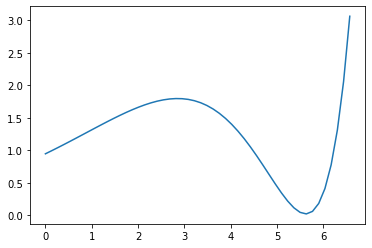

In [78]:
x = np.linspace(sol2.x[0], sol3.x[0])

L = np.polyfit([sol2.x[0], sol3.x[0]], [sol2.x[1], sol3.x[1]], 1)

y = np.polyval(L, x)

d = np.sqrt((x - x[0])**2 + (y - y[0])**2)
z = objective([x, y])
plt.plot(d, z)

What you can see from this plot there is a minimum between 5 and 6, but this is a region where the constraints are not satisfied. From 3 to 0, the objective function is going down, and at the end is a minimum that is at the boundary of the constraint. It still is not super  clear what is happening along the boundary of the feasible region. Next we look at how the constraints change along a line near the boundary.

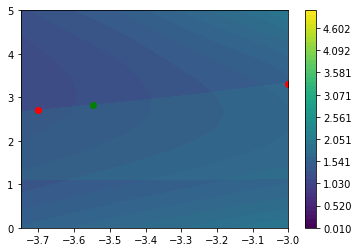

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(X1, X2, Z, levels=np.linspace(Z.min(), Z.min() + 5))
plt.colorbar()
IE1 = ineq1([X1, X2])
IE2 = ineq2([X1, X2])

plt.contourf(X1, X2, IE1, levels=np.linspace(0, IE1.max(), 2), alpha=0.2)
plt.contourf(X1, X2, IE2, levels=np.linspace(0, IE2.max(), 2), alpha=0.2)

plt.plot(sol1.x[0], sol1.x[1], 'ro')
plt.plot(sol2.x[0], sol2.x[1], 'go')
plt.plot(sol3.x[0], sol3.x[1], 'yo')

plt.xlim([-3.75, -3])
plt.ylim([0, 5])
plt.plot([-3.7], 2.7, 'ro')
plt.plot([-3.], 3.3, 'ro')

The line connecting the two red dots is approximately on the boundary. Next we plot the function and constraints along this line.

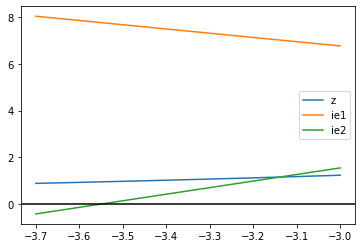

In [84]:
x = np.linspace(-3.7, -3.0)

L = np.polyfit([-3.7, -3.0], [2.7, 3.3], 1)

y = np.ones_like(x) * sol2.x[1] 
d = np.sqrt((x - x[0])**2 + (y - y[0])**2)
z = objective([x, y])
plt.plot(x, z)
plt.plot(x, ineq1([x, y]))
plt.plot(x, ineq2([x, y]))
plt.axhline(0, color='k')
plt.legend(['z', 'ie1', 'ie2'])

Here you can see what is happening. From right to left, z is decreasing. around x=-3.55, the second constraint changes from positive to negative, which changes the solution from feasible to infeasible. So that point marks the minimum that we found.